"""
Source:

https://www.depthfirstlearning.com/2018/InfoGAN
"""

## Entropy

How surprising would be to sample x? Measure of information.
$$h(x) = -log(p(x))$$

The uncertainty of a random variable x (how many yes/no questions do I need to ask to know x | the average number of bits that best encodes x without ambiguity):

$$H(x) = -\Sigma_x p(x)log(p(x))$$
$$H(x) = -E_x[h(x)]$$

This is called the entropy of a rv x.


## DKL

p(x) can be seen as the true model with perfect code and q(x) as some imperfect model, which has worse code than p(x). DKL is the average bits needed to encode x under q(x) minus the average bits needed to encode x under p(x). Since p(x) is a perfect code, this equation will always be positive.

$$D_\text{KL}(p \parallel q) = - \int p(x) \ln q(x) \, dx - \left( - \int p(x) \ln p(x) \, dx \right)$$
$$D_{\text{KL}}(p\parallel q)=\sum _{x\in {\mathcal {X}}}p(x)\,\log {\frac {p(x)}{q(x)}}$$


In [ ]:
import sys
from pathlib import Path

project_root = Path().absolute().parent.parent
results_dir = project_root / 'results'

sys.path.insert(0, str(project_root))

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from tqdm import tqdm

from utils.data_loaders import load_mnist
from utils.visualization import plot_training_history, visualize_predictions, visualize_batch

from vanilla_gan import VanillaGAN, VanillaGANConfig

In [3]:
class TrainingCFG:
    epochs = 100
    batch_size = 64
    val_split = 0.1

    device = VanillaGANConfig.device
    print(device)

cuda


In [4]:
vanilla_gan = VanillaGAN(VanillaGANConfig())

In [5]:
train, val, test = load_mnist(TrainingCFG.batch_size, TrainingCFG.val_split)

Epoch 10/100: D loss 1.4010, G loss 0.7348: 100%|██████████| 844/844 [00:15<00:00, 53.11it/s]


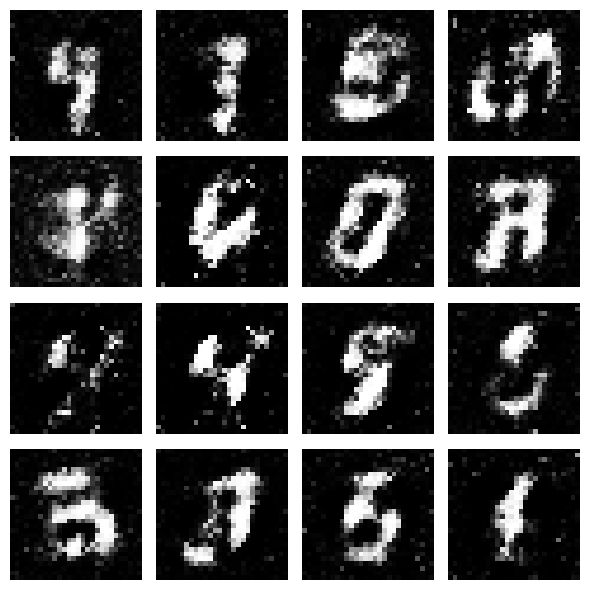

Epoch 20/100: D loss 1.8138, G loss 1.3358: 100%|██████████| 844/844 [00:15<00:00, 54.38it/s]


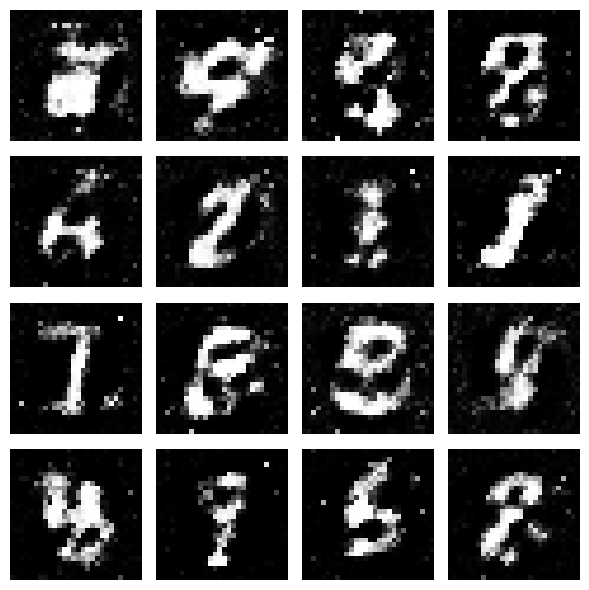

Epoch 30/100: D loss 0.3778, G loss 2.6895: 100%|██████████| 844/844 [00:15<00:00, 54.33it/s]


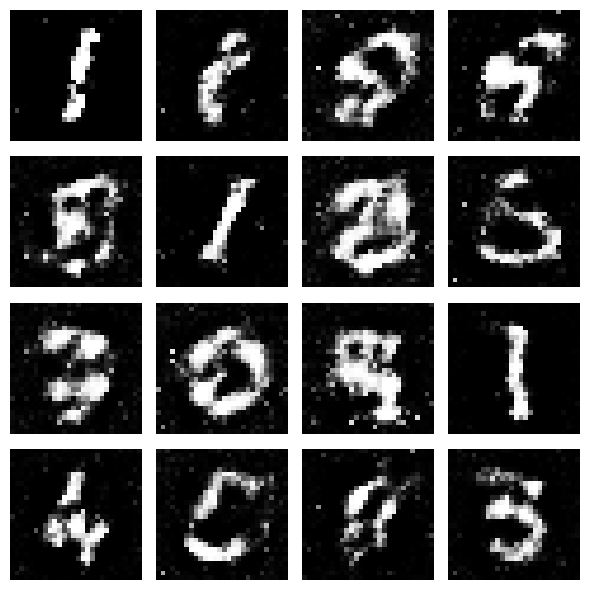

Epoch 40/100: D loss 0.3677, G loss 3.7522: 100%|██████████| 844/844 [00:16<00:00, 52.17it/s]


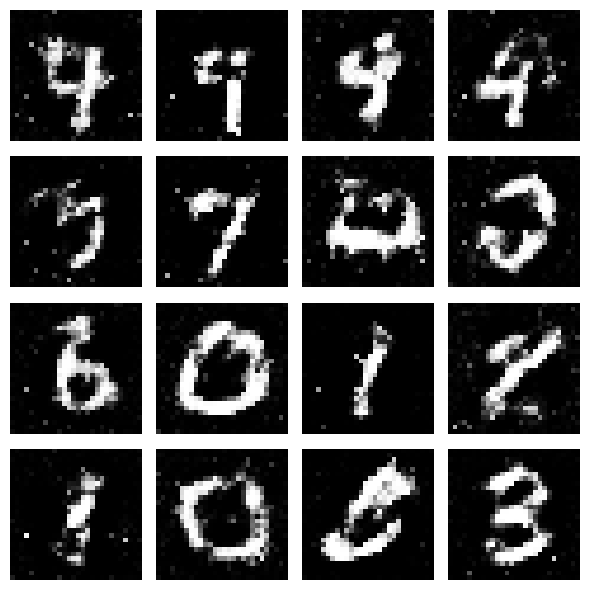

Epoch 50/100: D loss 0.9181, G loss 3.7659: 100%|██████████| 844/844 [00:16<00:00, 52.00it/s]


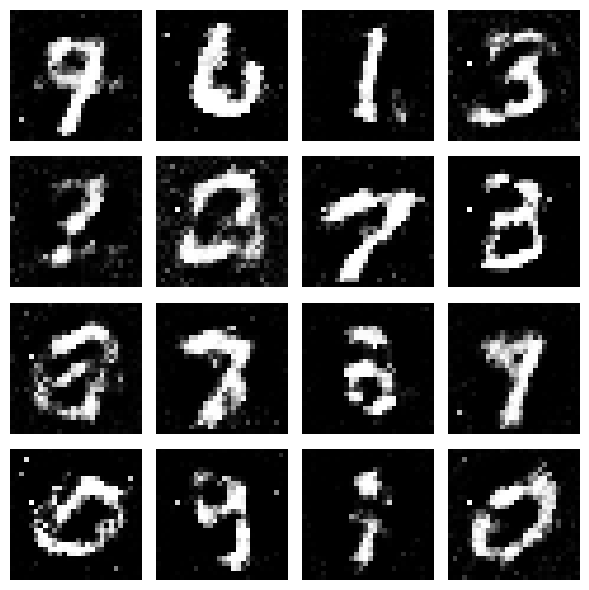

Epoch 60/100: D loss 0.5038, G loss 4.5885: 100%|██████████| 844/844 [00:16<00:00, 52.72it/s]


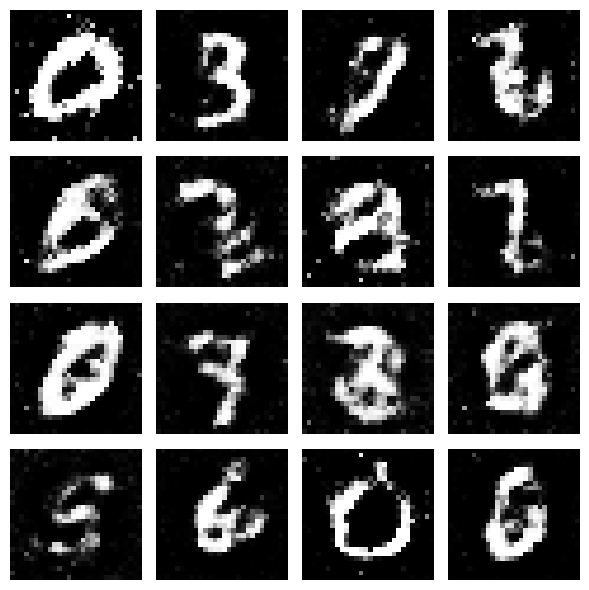

Epoch 70/100: D loss 0.0809, G loss 2.9737: 100%|██████████| 844/844 [00:16<00:00, 51.95it/s]


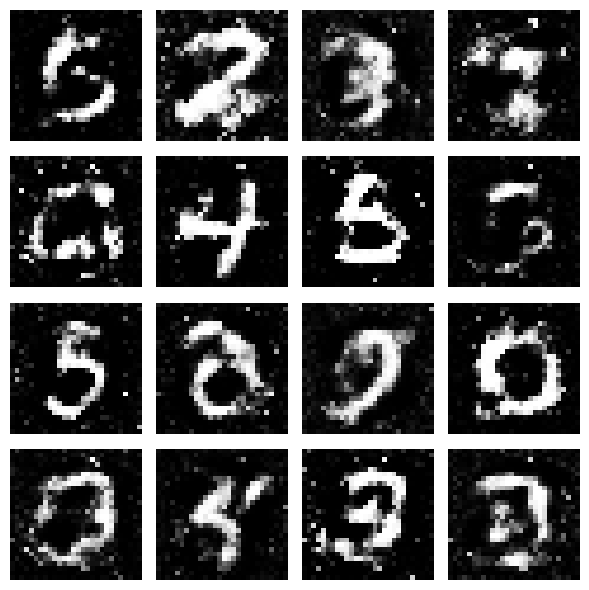

Epoch 80/100: D loss 0.9177, G loss 3.1716: 100%|██████████| 844/844 [00:15<00:00, 53.67it/s]


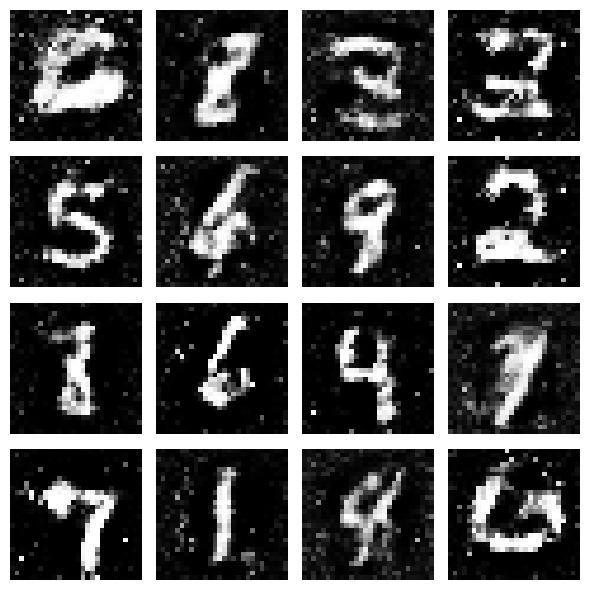

Epoch 90/100: D loss 3.2514, G loss 2.8805: 100%|██████████| 844/844 [00:15<00:00, 52.77it/s]


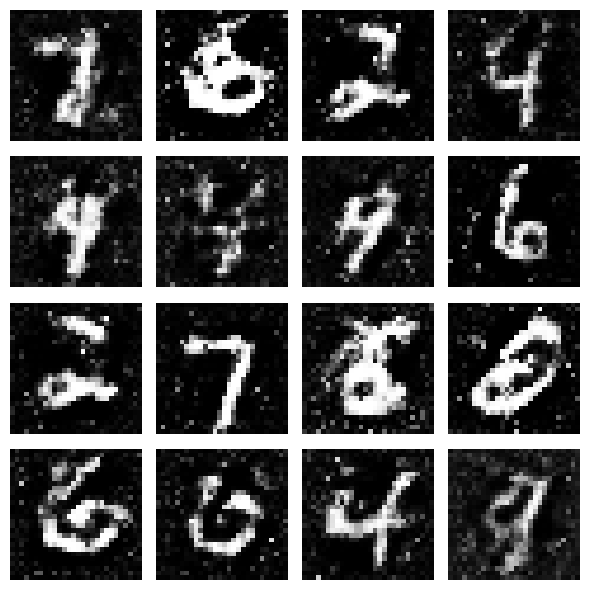

Epoch 100/100: D loss 1.0041, G loss 2.7912: 100%|██████████| 844/844 [00:16<00:00, 52.43it/s]


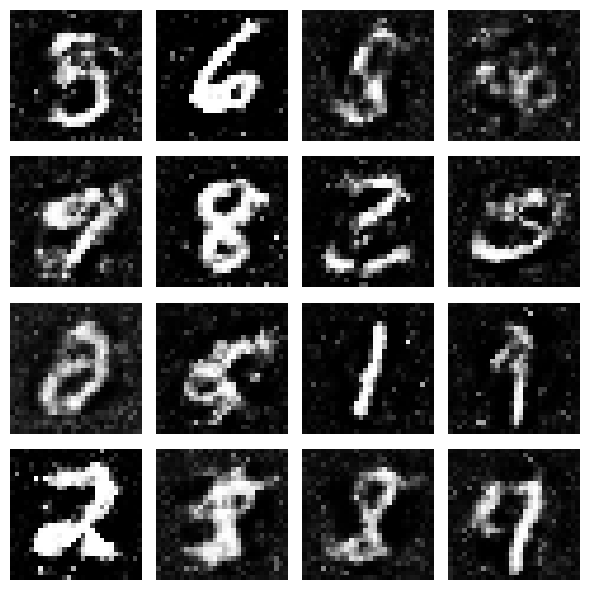

In [ ]:
for epoch in range(TrainingCFG.epochs):
    pbar = tqdm(train)
    for data, _ in pbar:
        data = data.to(TrainingCFG.device)
        
        discriminator_loss, generator_loss = vanilla_gan.train_step(data)
        pbar.set_description(f"Epoch {epoch+1}/{TrainingCFG.epochs}: D loss {discriminator_loss:.4f}, G loss {generator_loss:.4f}")

    if (epoch+1) % 10 == 0:
        generated_image = vanilla_gan.inference()

        show = True

        visualize_batch(generated_image, nrow=4, save_path=results_dir / f"gan_{epoch+1}.png", show=show)